In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import mean

In [2]:
from analysis import *
info = calculate_behaviour_info_for_all_strains(data_lookup_file='bsoid_strain_data.csv', min_bout_len=round(200 * FPS / 1000))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126/126 [02:54<00:00,  1.39s/it]


In [3]:
info_ = info.copy(deep=True)
info_['Total Duration'] = info['Total Duration']/60
info_['Average Bout Length'] = info['Average Bout Length']

# plotting routines

In [4]:
def sort_info_df(info, metric):
    N = info.shape[0]
    strains = {}
    for strain in info['Strain']:
        strains[strain] = []
        
    for i in range(N):
        data = info.iloc[i]
        strains[data['Strain']].append(data[metric])
    
    for key, value in strains.items():
        strains[key] = sum(value)/len(value)
    
    strains = dict(sorted(strains.items(), key=lambda item: item[1]))
    return strains.keys()

def plot_behaviour_metric(info, metric, order, ylabel=None):        
    ylabel = metric if ylabel is None else ylabel
    
    fig = plt.figure(figsize=(10, 100))
    g = sns.catplot(x='Strain', y=metric, data=info, hue='Sex', jitter=False, legend=False, order=order)
    ax = g.axes[0,0]
    ax.tick_params(grid_color='gray', grid_alpha=0.3, labelrotation=90, labelsize=8)
    ax.grid(True)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel('Strain', fontsize=12)
    ax.legend(loc='upper left')
    plt.gcf().set_size_inches(15, 2.2)
    return fig, ax

(<Figure size 720x7200 with 0 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x140a1de5ac0>)

<Figure size 720x7200 with 0 Axes>

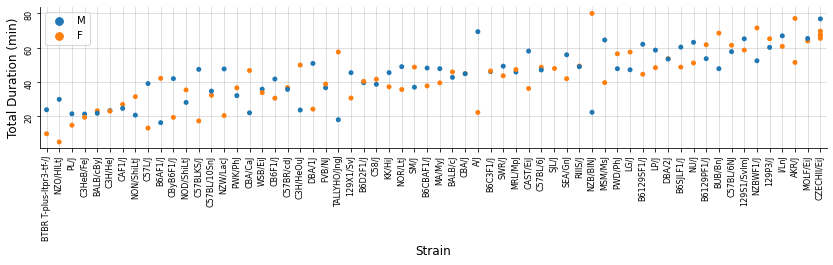

In [5]:
strains = list(sort_info_df(info_, 'Total Duration'))
plot_behaviour_metric(info_, 'Total Duration', strains, 'Total Duration (min)', )

<Figure size 720x7200 with 0 Axes>

<Figure size 720x7200 with 0 Axes>

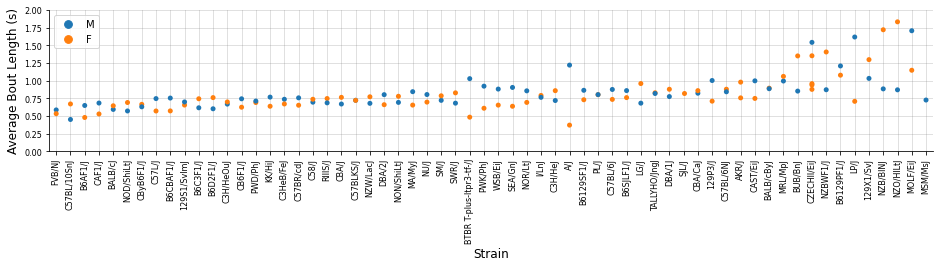

In [11]:
strains = list(sort_info_df(info_, 'Average Bout Length'))
fig, ax = plot_behaviour_metric(info_, 'Average Bout Length', strains, 'Average Bout Length (s)', )
ax.set_ylim([0, 2])
ax.tick_params(axis='y', labelrotation=0, labelsize=8)
fig

<Figure size 720x7200 with 0 Axes>

<Figure size 720x7200 with 0 Axes>

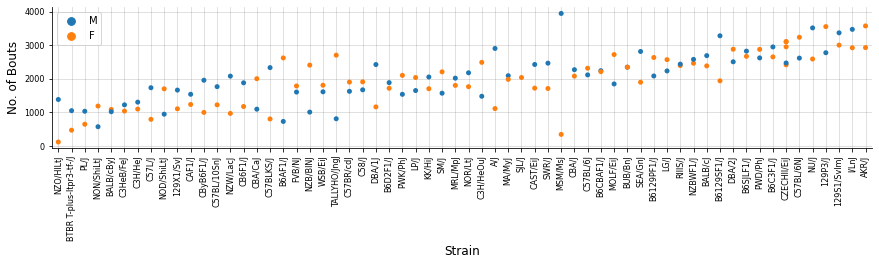

In [7]:
strains = list(sort_info_df(info_, 'No. of Bouts'))
fig, ax = plot_behaviour_metric(info_, 'No. of Bouts', strains, 'No. of Bouts', )
ax.tick_params(axis='y', labelrotation=0, labelsize=8)
fig